# Regresión lineal para predicción de progresión de diabetes
- age: Representa la edad del paciente, normalizada (no es la edad real, sino una representación estandarizada).
- sex: Sexo del paciente, representado como una variable numérica normalizada (valores entre -0.5 y 0.5).
- bmi: Índice de Masa Corporal (Body Mass Index, BMI), una medida del peso relativo al cuadrado de la altura.
- bp:
Promedio de presión arterial (Blood Pressure, BP), normalizada.
- s1: Nivel sérico de lípidos totales (colesterol total).
- s2: Nivel sérico de lipoproteínas de baja densidad (LDL, “colesterol malo”).
- s3: Nivel sérico de lipoproteínas de alta densidad (HDL, “colesterol bueno”).
- s4: Relación entre el colesterol total y HDL.
- s5: Nivel sérico de triglicéridos, representado como una medida numérica normalizada.
- s6: Nivel sérico de glucosa en ayuno, una medida clave en el monitoreo de la diabetes.

In [1]:
# Manipulación de datos
import pandas as pd  #Manipulación de datos
import numpy as np   #Operaciones númericas

# Visualización
import matplotlib.pyplot as plt  #Gráficas

# Scikit-learn
from sklearn.datasets import load_diabetes   #Data set de ejemplo 
from sklearn.model_selection import train_test_split   #División 
from sklearn.preprocessing import StandardScaler  #Escalador
from sklearn.linear_model import LinearRegression  #Modelo
from sklearn.metrics import mean_squared_error, r2_score   #Métricas
 

In [2]:
data = load_diabetes() #Cargamos el dataset
df = pd.DataFrame(data.data, columns=data.feature_names)  #Convertimos a dataframe
df["target"] = data.target  #Agregamos la variable objetivo


In [3]:
X = df.drop("target", axis=1) #Variables de entrada
y = df["target"]     #Variable a predecir


In [4]:
#Separamos entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42      
)


In [5]:
scaler = StandardScaler()  #Escalado
X_train_scaled = scaler.fit_transform(X_train) #Aprende media y desviación solo del train 
X_test_scaled = scaler.transform(X_test)  #Usamos las mismas estadísticas para test


In [6]:
model = LinearRegression() #Creamos el modelo
model.fit(X_train_scaled, y_train) #Entrenamos el modelo


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [7]:
y_pred = model.predict(X_test_scaled) #Hacemos las predicciones


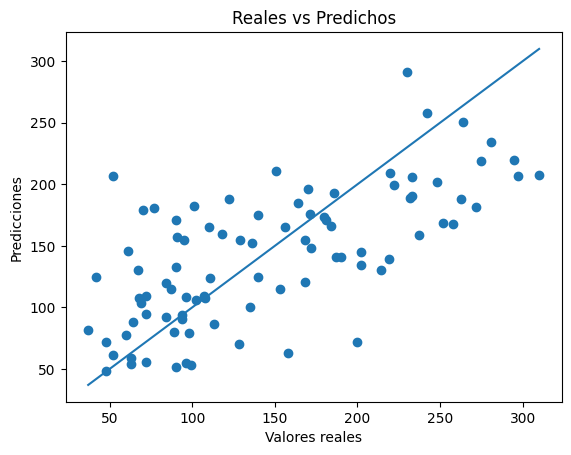

In [10]:
plt.scatter(y_test, y_pred)

# Línea ideal y = x
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()]
)

plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Reales vs Predichos")
plt.show()


In [9]:
#Evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2:", r2)


MSE: 2900.1936284934823
R2: 0.45260276297191926
